In [1]:
# GAN
# 출처 : https://github.com/golbin/TensorFlow-Tutorials/blob/master/09%20-%20GAN/01%20-%20GAN.py

# tensorflow 및 GAN을 돌리는데 필요한 library를 import
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# mnist data를 import해서 mnist라는 변수에 저장
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

W0826 01:39:17.463601 19868 deprecation.py:323] From <ipython-input-1-91c0fb6d590b>:11: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0826 01:39:17.475569 19868 deprecation.py:323] From C:\Users\Namwoo\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0826 01:39:17.477564 19868 deprecation.py:323] From C:\Users\Namwoo\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Ple

Extracting ./mnist/data/train-images-idx3-ubyte.gz


W0826 01:39:17.863531 19868 deprecation.py:323] From C:\Users\Namwoo\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0826 01:39:17.870514 19868 deprecation.py:323] From C:\Users\Namwoo\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0826 01:39:17.963265 19868 deprecation.py:323] From C:\Users\Namwoo\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future v

Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
# hyper parameter 선언
total_epoch = 30 # 전체 학습하는 과정을 100번 돌림
batch_size = 100 # data를 가져올때마다 image 100개씩 가져와서 처리함
learning_rate = 0.0002 # learning rate 설정

# 신경망 레이어 구성 옵션
n_hidden = 256 # hidden layer 차원 크기 설정
n_input = 28 * 28 # image size
n_noise = 128  # 생성기의 입력값으로 사용할 노이즈의 크기

In [3]:
# 신경망 모델 구성

X = tf.placeholder(tf.float32, [None, n_input]) # 입력으로 들어갈 이미지가 이 변수에 담기게 될 예정
Z = tf.placeholder(tf.float32, [None, n_noise]) # 노이즈 Z를 입력값으로 사용

# 생성기(Generator) 신경망에 사용하는 변수
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01)) # 랜덤한 숫자로 weight를 초기화
G_b1 = tf.Variable(tf.zeros([n_hidden])) # 0으로 초기화
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

# 판별기(Discriminator) 신경망에 사용하는 변수
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))

# 판별기의 최종 결과값은 얼마나 진짜와 가깝냐를 판단하는 한 개의 스칼라값
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1])) # 한개의 스칼라 값 = 숫자 하나를 0으로 초기화

In [4]:
# 생성기(Generator)의 신경망을 구성
def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1) # hidden layer는 relu 사용. noise_z가 input으로 들어간다.
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2) # output은 sigmoid를 사용하여 0과 1사이 값으로 output이 나오도록 한다.
    return output

In [5]:
# 판별기(Discriminator)의 신경망을 구성
def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1) # inputs(이미지)가 input으로 들어감
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2) # 마찬가지로 sigmoid를 사용하여 0과 1사이 값으로 나오고 참/거짓으로 분류
    return output

In [6]:
# 랜덤한 노이즈(Z) 생성
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))

In [7]:
# 노이즈를 이용해 랜덤한 이미지를 생성
G = generator(Z)
# 노이즈를 이용해 생성한 이미지가 진짜 이미지인지 판별한 값을 구함
D_gene = discriminator(G)
# 진짜 이미지를 이용해 판별한 값을 구함
D_real = discriminator(X)

In [8]:
# Discriminator의 loss 함수
# 판별기(D)에 진짜 이미지 tf.log(D_real)를 넣었을 때도 가짜 이미지 tf.log(1 - D_gene)를 넣었을 때도 최대값을 갖도록 학습한다
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene))

![](img/g.PNG)

In [9]:
# Generator의 loss 함수
# 생성기(G)는 가짜 이미지를 넣었을 때 D가 실제 이미지라고 판단하도록 D_gene 값을 최대화 하도록 학습한다
loss_G = tf.reduce_mean(tf.log(D_gene))

![](img/d.PNG)

In [10]:
# loss_D 를 구할 때는 판별기 신경망에 사용되는 변수만 사용하고,
# loss_G 를 구할 때는 생성기 신경망에 사용되는 변수만 사용하여 최적화
D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]

In [11]:
# GAN 논문의 수식에 따르면 loss 를 극대화 해야하지만, minimize 하는 최적화 함수를 사용하기 때문에
# 최적화 하려는 loss_D 와 loss_G 에 음수 부호를 붙여줌
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D,var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G,var_list=G_var_list)

Epoch: 0000 D loss: -0.4563 G loss: -2.145


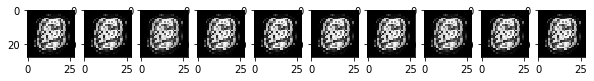

Epoch: 0001 D loss: -0.2136 G loss: -2.672
Epoch: 0002 D loss: -0.136 G loss: -3.099
Epoch: 0003 D loss: -0.3172 G loss: -1.905
Epoch: 0004 D loss: -0.3322 G loss: -2.342
Epoch: 0005 D loss: -0.3155 G loss: -2.575
Epoch: 0006 D loss: -0.206 G loss: -2.947
Epoch: 0007 D loss: -0.2 G loss: -3.122
Epoch: 0008 D loss: -0.1884 G loss: -3.202
Epoch: 0009 D loss: -0.3172 G loss: -2.653


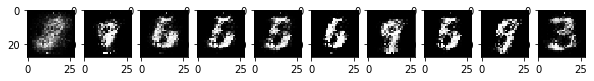

Epoch: 0010 D loss: -0.2892 G loss: -2.768
Epoch: 0011 D loss: -0.4394 G loss: -2.162
Epoch: 0012 D loss: -0.4208 G loss: -2.278
Epoch: 0013 D loss: -0.3818 G loss: -2.5
Epoch: 0014 D loss: -0.3231 G loss: -2.737
Epoch: 0015 D loss: -0.4089 G loss: -2.494
Epoch: 0016 D loss: -0.2634 G loss: -2.887
Epoch: 0017 D loss: -0.3299 G loss: -2.794
Epoch: 0018 D loss: -0.412 G loss: -2.415
Epoch: 0019 D loss: -0.3871 G loss: -2.442


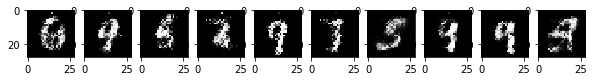

Epoch: 0020 D loss: -0.3634 G loss: -2.551
Epoch: 0021 D loss: -0.2949 G loss: -2.764
Epoch: 0022 D loss: -0.226 G loss: -3.261
Epoch: 0023 D loss: -0.3714 G loss: -2.866
Epoch: 0024 D loss: -0.3333 G loss: -2.957
Epoch: 0025 D loss: -0.289 G loss: -3.156
Epoch: 0026 D loss: -0.2084 G loss: -3.491
Epoch: 0027 D loss: -0.3423 G loss: -3.017
Epoch: 0028 D loss: -0.2756 G loss: -3.663
Epoch: 0029 D loss: -0.387 G loss: -2.794


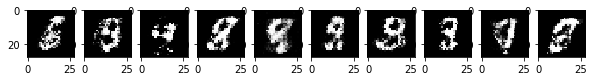

최적화 완료!


In [12]:
# 신경망 모델 학습

sess = tf.Session() # 세션 생성
sess.run(tf.global_variables_initializer()) # 변수 초기화

total_batch = int(mnist.train.num_examples/batch_size) # 전체 이미지 갯수/batch_size 해서 한번 학습 할때 100batch_size로 몇번을 해야 1epoch을 도는지 계산
loss_val_D, loss_val_G = 0, 0 # 변수 0으로 초기화

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)

        # 판별기와 생성기 신경망을 각각 학습
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Z: noise})

    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))
    
    
    # 학습이 되어가는 모습을 보기 위해 주기적으로 이미지를 보여줌
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})
        
        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

        for i in range(sample_size):
            ax[i].imshow(np.reshape(samples[i], (28, 28)), 'gray')
        
        plt.show()

print('최적화 완료!')

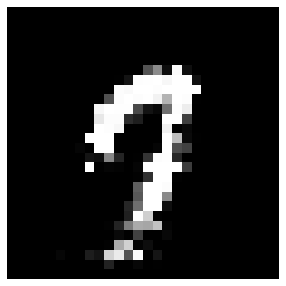

In [13]:
noise =get_noise(1, n_noise)
G_img = sess.run(G, feed_dict = {Z: noise})

plt.figure(figsize = (5,5))
plt.imshow(G_img.reshape(28,28), 'gray')
plt.axis('off')
plt.show()